In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

In [7]:
df_standartized = pd.read_csv("../data/df_standartized.csv")
df_standartized.head(5)

emotion_cols = ["frustrated", "upset", "hostile", "alert", "ashamed",
                "inspired", "nervous", "attentive", "afraid", "active", "determined"]

df_emotions = df_standartized[emotion_cols]

scaler = StandardScaler()
# numpy to df
df_emotions = pd.DataFrame(scaler.fit_transform(df_emotions) , columns=df_emotions.columns, index=df_emotions.index)

df_emotions.head(5)
responseLabels = df_standartized.Individual.to_numpy()

metrics_cols = ["HR", "TEMP", "EDA"]
df_metrics = df_standartized[[col for col in df_standartized.columns if any(col.startswith(metric) for metric in metrics_cols)]]

df_metrics.head(5)

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,...,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT
0,0.010023,-0.062352,0.187214,-0.163880,0.001629,-0.312526,-0.621392,-0.007322,-0.414857,0.978121,...,-0.674626,0.276417,-1.310763,0.595726,-0.667286,0.135978,0.096659,-1.012991,1.133924,0.099359
1,-0.176801,-0.069806,-0.793634,0.111690,-0.570809,-0.086288,-0.114281,-0.045281,0.532375,-0.699948,...,-0.674647,0.136077,0.945391,0.595677,-0.666593,0.135187,0.095006,-0.689332,0.467018,0.290207
2,-0.033122,0.038688,-0.774299,0.369032,-0.544302,-0.988619,-0.336389,-0.740408,-0.158848,-0.343025,...,-0.680703,-0.072207,0.568117,0.596330,-0.667436,0.130645,0.091310,-1.093906,-0.056367,0.158108
3,0.398059,0.532294,0.163883,0.068800,0.206917,0.153083,-0.486637,-0.513035,0.263566,0.280258,...,-0.677889,0.625703,1.341971,0.589771,-0.658566,0.129049,0.090101,-0.932077,-0.242008,-0.339003
4,-0.551609,-0.376240,-0.671610,-0.410499,-0.703343,-0.311621,0.152870,-1.139046,0.500374,-0.385643,...,-0.677829,0.230709,1.690908,0.590443,-0.662295,0.138101,0.098103,-0.284758,-0.401715,-0.142285


In [8]:
# df to numpy
X = df_metrics.to_numpy()
n, p = np.shape(X)

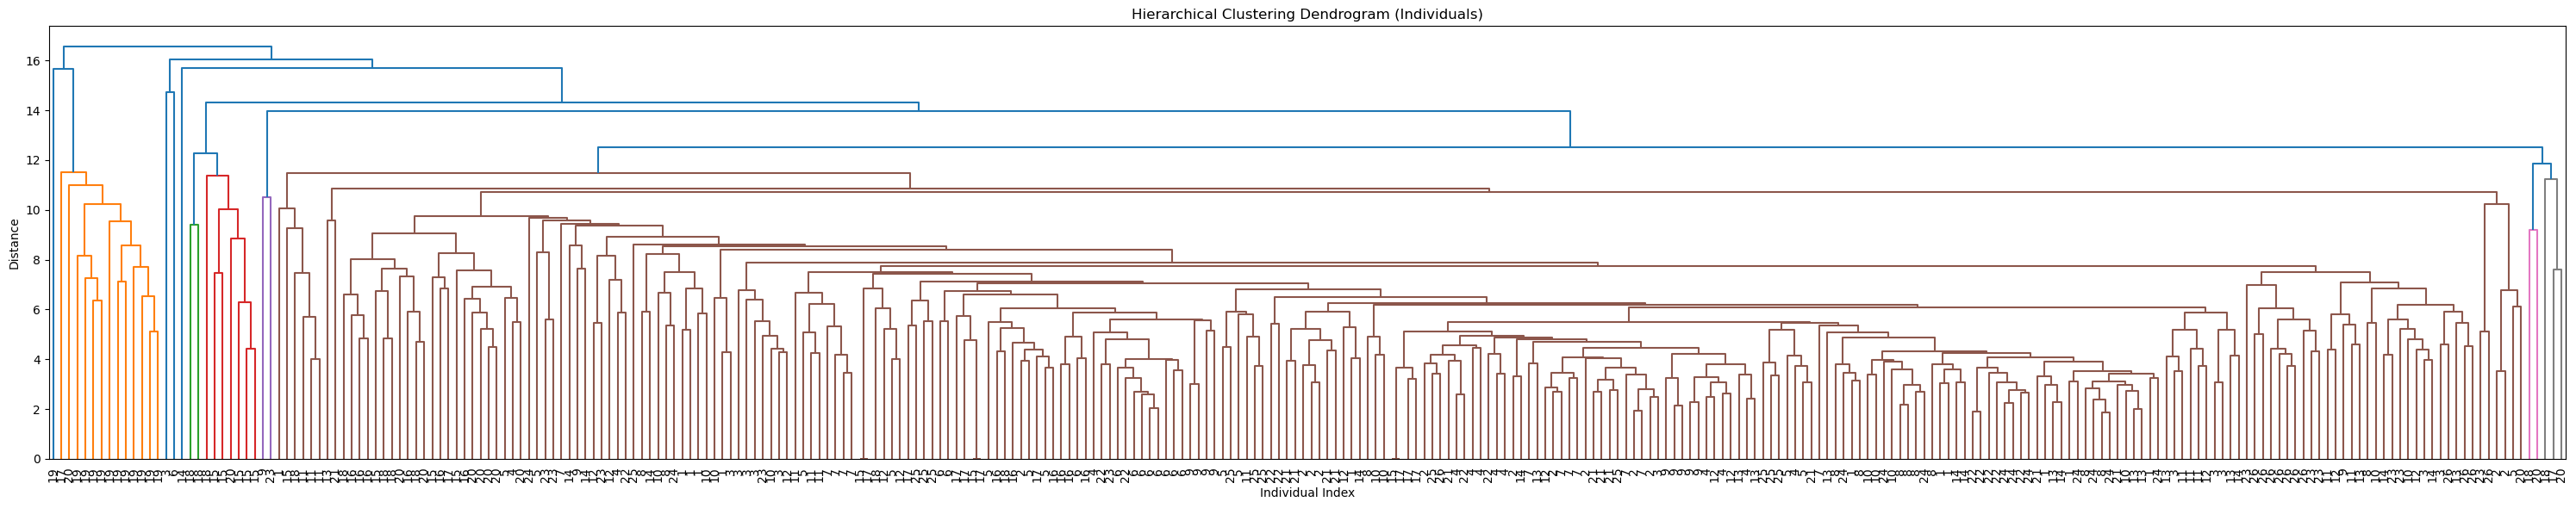

In [20]:
# Hierarchical clustering
Z = linkage(X, method='average')

# Plot dendrogram
plt.figure(figsize=(30, 6))
plt.title('Hierarchical Clustering Dendrogram (Individuals)')
plt.xlabel('Individual Index')
plt.ylabel('Distance')

dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=10.,
    truncate_mode=None,  # Show full tree
    labels=df_standartized["Individual"].values,  # Show individual IDs
    color_threshold=0.7 * max(Z[:, 2])  # Optional: to color clusters
)

plt.tight_layout()
plt.show()

In [15]:
#look at the individual clusters
k=26 #Number of clusters. Determine a usable number from dendrogram

cluster_designation = fcluster(Z, k, criterion='maxclust') #Get cluster designation of data points

for i in range(1,k+1):
    datapoints = np.where(cluster_designation==i,)
    print('The labels associated with cluster {} is:'.format(i))
    print(responseLabels[datapoints])
    print('\n')

The labels associated with cluster 1 is:
[ 3  5 10 22 23 23 23 23 23 23 23 23 26 26 26 26 26 26 26 26 26 26 26]


The labels associated with cluster 2 is:
[1 3]


The labels associated with cluster 3 is:
[6]


The labels associated with cluster 4 is:
[ 5  7  7  7  7 11 11 11 11 15 18]


The labels associated with cluster 5 is:
[ 1  1  1  2  2  2  8  8  8 12 13 13 14 14 21 21 21 21 21 22 22 22 22 24
 24 24 24 25]


The labels associated with cluster 6 is:
[ 1  1  1  1  1  1  1  1  3  8  8  8  8  8  8 10 10 10 10 10 10 13 13 13
 14 14 14 21 22 22 22 24 24 24 24 24 24 24]


The labels associated with cluster 7 is:
[ 2  2  2  2  2  3  4  4  4  4  4  4  4  5  5  7  7  7  7  7  9  9  9 11
 11 12 12 12 13 13 13 14 21 21 21 21 21 22 22 25 25 25 25 25 26]


The labels associated with cluster 8 is:
[ 3  3  3  3 10 12 14 23]


The labels associated with cluster 9 is:
[ 7  8  8  9 10 10 10 11 11 12 13]


The labels associated with cluster 10 is:
[ 3  3  3  3  7  7 11 11 11 12 12 13 13 14 14 14 14 

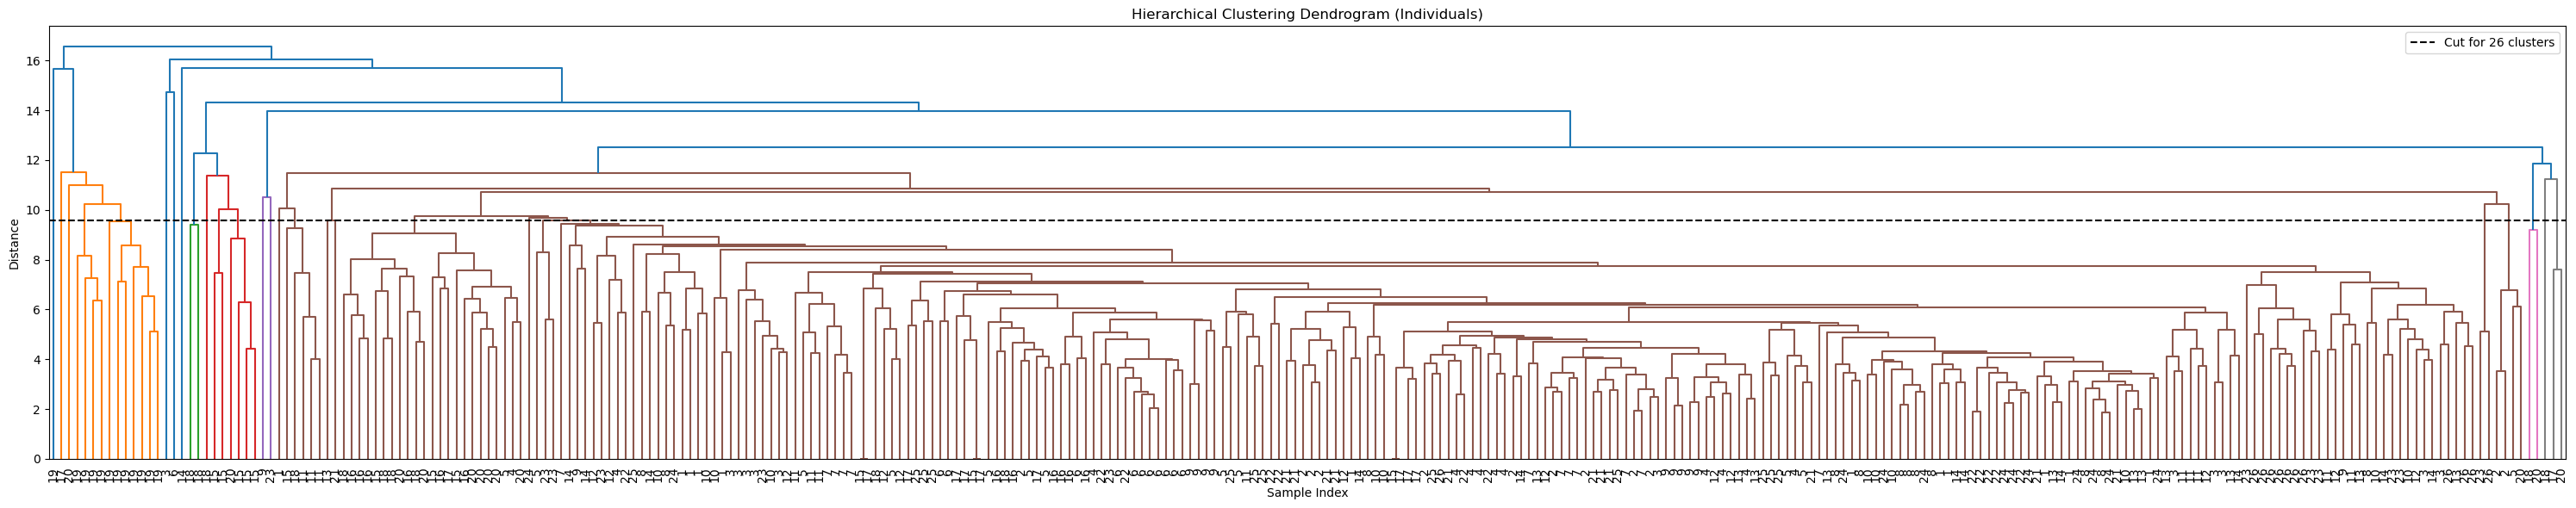

In [29]:
cluster_labels = fcluster(Z, t=26, criterion='distance')

plt.figure(figsize=(30, 6))
plt.title('Hierarchical Clustering Dendrogram (Individuals)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=10.,
    truncate_mode=None,
    labels=df_standartized["Individual"].values,
    color_threshold=0.7 * max(Z[:, 2])  # or use a fixed value based on t
)

# Add cut line for 26 clusters
max_d = Z[-(26-1), 2]  # height to cut for 26 clusters
plt.axhline(y=max_d, c='k', linestyle='--', label=f'Cut for 26 clusters')

plt.legend()
plt.tight_layout()
plt.show()

In [30]:
df_standartized["Cluster"] = cluster_labels
print(df_standartized.groupby(["Individual", "Cluster"]).size())

Individual  Cluster
1           1          12
2           1          12
3           1          12
4           1          12
5           1          12
6           1          12
7           1          12
8           1          12
9           1          12
10          1          12
11          1          12
12          1          12
13          1          12
14          1          12
15          1          12
16          1          12
17          1          12
18          1          12
19          1          12
20          1          12
21          1          12
22          1          12
23          1          12
24          1          12
25          1          12
26          1          12
dtype: int64


In [31]:
df_standartized.head(30)

,Individual,Round,Phase,Puzzler,Cohort,frustrated,upset,hostile,alert,ashamed,...,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT,Cluster
0,1,round_3,phase3,1,D1_4,2.0,1.0,1.0,2.0,1.0,...,0.276417,-1.310763,0.595726,-0.667286,0.135978,0.096659,-1.012991,1.133924,0.099359,1
1,1,round_3,phase2,1,D1_4,3.0,2.0,1.0,3.0,2.0,...,0.136077,0.945391,0.595677,-0.666593,0.135187,0.095006,-0.689332,0.467018,0.290207,1
2,1,round_3,phase1,1,D1_4,2.0,1.0,1.0,2.0,1.0,...,-0.072207,0.568117,0.596330,-0.667436,0.130645,0.091310,-1.093906,-0.056367,0.158108,1
3,1,round_2,phase3,1,D1_4,2.0,1.0,1.0,2.0,1.0,...,0.625703,1.341971,0.589771,-0.658566,0.129049,0.090101,-0.932077,-0.242008,-0.339003,1
4,1,round_2,phase2,1,D1_4,2.0,3.0,1.0,3.0,2.0,...,0.230709,1.690908,0.590443,-0.662295,0.138101,0.098103,-0.284758,-0.401715,-0.142285,1
5,1,round_2,phase1,1,D1_4,2.0,1.0,1.0,3.0,2.0,...,0.351730,1.189370,0.597366,-0.669197,0.132407,0.092918,-0.851162,1.760464,0.221377,1
6,1,round_4,phase3,1,D1_4,0.0,1.0,1.0,1.0,1.0,...,-0.623205,0.169136,0.501368,-0.476845,0.320754,0.298519,-0.284758,0.409103,0.120891,1
7,1,round_4,phase2,1,D1_4,0.0,1.0,1.0,2.0,1.0,...,1.616516,-0.038779,0.590467,-0.656198,0.127598,0.088157,-0.689332,-0.150747,-0.167919,1
8,1,round_4,phase1,1,D1_4,1.0,1.0,1.0,1.0,1.0,...,-0.420139,0.698562,0.596369,-0.668733,0.126604,0.087255,-0.851162,1.001623,0.011234,1
9,1,round_1,phase3,1,D1_4,2.0,1.0,1.0,3.0,1.0,...,-0.132116,0.575435,0.595598,-0.667970,0.129336,0.090799,-1.093906,1.264965,1.197521,1
